# Importing the dependencies

In [48]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load the cleaned dataset

In [49]:
data = pd.read_csv('../datasets/cleaned_twitter_training.csv').astype(str)

In [50]:
data.head()

,Unnamed: 0,context,sentiment,text,cleaned_text
0,0,Borderlands,1,im getting on borderlands and i will murder yo...,get borderland murder
1,1,Borderlands,1,I am coming to the borders and I will kill you...,come border kill
2,2,Borderlands,1,im getting on borderlands and i will kill you ...,get borderland kill
3,3,Borderlands,1,im coming on borderlands and i will murder you...,come borderland murder
4,6,Borderlands,1,So I spent a few hours making something for fu...,spent hour make someth fun know huge fan maya ...


In [51]:
data = data.drop(['Unnamed: 0'], axis=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    data['cleaned_text'], data['sentiment'], stratify=data['sentiment']) # test 25%, train 75%

In [53]:
X_train

14566    go suck dri fortnit twitch tv mintyyprod intol...
13291                           fr understand terribl film
9151     html liter get screw charact sinc updat point ...
8627     imagin tri play new raid classic core server c...
7857                                   ps leav best friend
                               ...                        
14355                     ruin life learn twitch tv quirki
32148                            serious mad look unbeliev
27301    hello facebook show feed recent kudo final fac...
14912    fortnitegam fortnit take lightsab past movi an...
20945                        low key miss smell home depot
Name: cleaned_text, Length: 25971, dtype: object

In [54]:
y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [55]:
# Hyperparameters
VOCAB_SIZE = 1000
EMBEDDING_DIM = 16
MAX_LENGTH = 20
TRUNCATING_TYPE='post'
PADDING_TYPE='post'
OOV_TOKEN = "<OOV>"

In [56]:
# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(X_train.values.tolist())

In [57]:
def preprocess_texts(texts: list[str]):
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=MAX_LENGTH, padding=PADDING_TYPE, truncating=TRUNCATING_TYPE)
    return padded_sequences

# Constructing the model

In [58]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH, name='embedding'),
        tf.keras.layers.Flatten(name='flatten'),
        tf.keras.layers.Dense(6, activation='relu', name='dense_relu'),
        tf.keras.layers.Dense(1, activation='sigmoid', name='dense_sigmoid'),
    ])
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    
    return model

In [59]:
# Define neural networks
experimenting_model = create_model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 16)            16000     
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense_relu (Dense)          (None, 6)                 1926      
                                                                 
 dense_sigmoid (Dense)       (None, 1)                 7         
                                                                 
Total params: 17,933
Trainable params: 17,933
Non-trainable params: 0
_________________________________________________________________


In [60]:
preprocessed_X_train = preprocess_texts(X_train)

In [61]:
EPOCHS = 15
y_train = np.array(y_train)
experimenting_model.fit(preprocessed_X_train, y_train, epochs=EPOCHS, verbose=2)

Epoch 1/15
812/812 - 4s - loss: 0.5073 - accuracy: 0.7382 - 4s/epoch - 4ms/step
Epoch 2/15
812/812 - 2s - loss: 0.3478 - accuracy: 0.8513 - 2s/epoch - 3ms/step
Epoch 3/15
812/812 - 2s - loss: 0.2899 - accuracy: 0.8811 - 2s/epoch - 3ms/step
Epoch 4/15
812/812 - 2s - loss: 0.2483 - accuracy: 0.9000 - 2s/epoch - 3ms/step
Epoch 5/15
812/812 - 3s - loss: 0.2186 - accuracy: 0.9140 - 3s/epoch - 3ms/step
Epoch 6/15
812/812 - 3s - loss: 0.1932 - accuracy: 0.9252 - 3s/epoch - 3ms/step
Epoch 7/15
812/812 - 2s - loss: 0.1743 - accuracy: 0.9331 - 2s/epoch - 3ms/step
Epoch 8/15
812/812 - 2s - loss: 0.1604 - accuracy: 0.9394 - 2s/epoch - 3ms/step
Epoch 9/15
812/812 - 2s - loss: 0.1458 - accuracy: 0.9436 - 2s/epoch - 3ms/step
Epoch 10/15
812/812 - 3s - loss: 0.1343 - accuracy: 0.9499 - 3s/epoch - 3ms/step
Epoch 11/15
812/812 - 3s - loss: 0.1252 - accuracy: 0.9536 - 3s/epoch - 3ms/step
Epoch 12/15
812/812 - 3s - loss: 0.1179 - accuracy: 0.9560 - 3s/epoch - 3ms/step
Epoch 13/15
812/812 - 3s - loss: 0.11

In [62]:
def classify_text(model, text: str):
    preprocessed_text = preprocess_texts([text]) # Pre-processed texts must be a list for the model to consume
    prediction = model.predict(preprocessed_text)
    print(prediction)
    
    return "Positive" if prediction >= .5 else "Negative"


In [63]:
test_text = "Holy shit!"
classify_text(experimenting_model, test_text)

1/1 [==============================] - 0s 142ms/step
[[0.07635267]]


'Negative'

In [64]:
X_test

9988                                              omfg let
26183                                          tricki make
7962     think design look great least go make someth s...
20267    okay verizon gone nut paid mom bill onlin got ...
30775    guess want give back sinc cancer trust almost ...
                               ...                        
23914    replay red dead redempt pleas know hors minerv...
12048    finish odyssey creed assassin bore know rockst...
17364                                   akolyt leeroy miss
31501    wait hurt wait wait also rememb see teaser tra...
19777         apolog anoth verizon brand oil london goodby
Name: cleaned_text, Length: 8658, dtype: object

In [65]:
preprocessed_X_test = preprocess_texts(X_test)
preprocessed_X_test

array([[  1, 111,   0, ...,   0,   0,   0],
       [  1,  17,   0, ...,   0,   0,   0],
       [ 55, 486,  19, ..., 974,   0,   0],
       ...,
       [  1,   1, 147, ...,   0,   0,   0],
       [ 40,   1,  40, ...,  55, 197, 651],
       [  1, 139,  59, ...,   0,   0,   0]])

In [66]:
experimenting_model.evaluate(preprocessed_X_test, y_test)

271/271 [==============================] - 1s 3ms/step - loss: 0.5403 - accuracy: 0.8449


[0.5403100848197937, 0.8448833227157593]

In [67]:
y_preds = experimenting_model.predict(preprocessed_X_test)
y_preds = y_preds.flatten()
y_preds = np.where(y_preds > .5, 1, 0)

271/271 [==============================] - 1s 3ms/step


In [68]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      4651
         1.0       0.84      0.82      0.83      4007

    accuracy                           0.84      8658
   macro avg       0.84      0.84      0.84      8658
weighted avg       0.84      0.84      0.84      8658



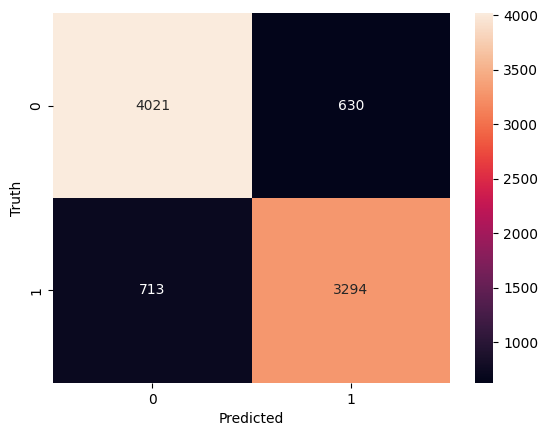

In [69]:
cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Constructing The 'ready-to-use' Model

In [70]:
model = create_model()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 16)            16000     
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense_relu (Dense)          (None, 6)                 1926      
                                                                 
 dense_sigmoid (Dense)       (None, 1)                 7         
                                                                 
Total params: 17,933
Trainable params: 17,933
Non-trainable params: 0
_________________________________________________________________


In [71]:
preprocessed_X = preprocess_texts(data['cleaned_text'])
y = data['sentiment'].to_numpy()

In [76]:
preprocessed_X

array([[  4,  70,   1, ...,   0,   0,   0],
       [ 65,   1, 129, ...,   0,   0,   0],
       [  4,  70, 129, ...,   0,   0,   0],
       ...,
       [815, 472,   1, ...,   0,   0,   0],
       [815, 472,   1, ...,   0,   0,   0],
       [  6, 472,   1, ...,   0,   0,   0]])

In [77]:
y = y.astype(float)

In [78]:
model.fit(preprocessed_X, y, epochs=EPOCHS, verbose=2)

Epoch 1/15
1083/1083 - 4s - loss: 0.4690 - accuracy: 0.7702 - 4s/epoch - 4ms/step
Epoch 2/15
1083/1083 - 3s - loss: 0.3365 - accuracy: 0.8517 - 3s/epoch - 3ms/step
Epoch 3/15
1083/1083 - 3s - loss: 0.2819 - accuracy: 0.8803 - 3s/epoch - 3ms/step
Epoch 4/15
1083/1083 - 3s - loss: 0.2421 - accuracy: 0.9002 - 3s/epoch - 3ms/step
Epoch 5/15
1083/1083 - 3s - loss: 0.2133 - accuracy: 0.9123 - 3s/epoch - 3ms/step
Epoch 6/15
1083/1083 - 3s - loss: 0.1901 - accuracy: 0.9227 - 3s/epoch - 3ms/step
Epoch 7/15
1083/1083 - 3s - loss: 0.1731 - accuracy: 0.9301 - 3s/epoch - 3ms/step
Epoch 8/15
1083/1083 - 3s - loss: 0.1593 - accuracy: 0.9366 - 3s/epoch - 3ms/step
Epoch 9/15
1083/1083 - 3s - loss: 0.1467 - accuracy: 0.9410 - 3s/epoch - 3ms/step
Epoch 10/15
1083/1083 - 3s - loss: 0.1364 - accuracy: 0.9450 - 3s/epoch - 3ms/step
Epoch 11/15
1083/1083 - 3s - loss: 0.1277 - accuracy: 0.9489 - 3s/epoch - 3ms/step
Epoch 12/15
1083/1083 - 3s - loss: 0.1205 - accuracy: 0.9514 - 3s/epoch - 3ms/step
Epoch 13/15
1

In [79]:
model.save('../models/yapping_classifier_model')

INFO:tensorflow:Assets written to: ./models/yapping_classifier_model\assets


In [80]:
with open('../models/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)